✅ Random Forest model loaded
📊 SHAP Global Summary Plot (Fault Class)


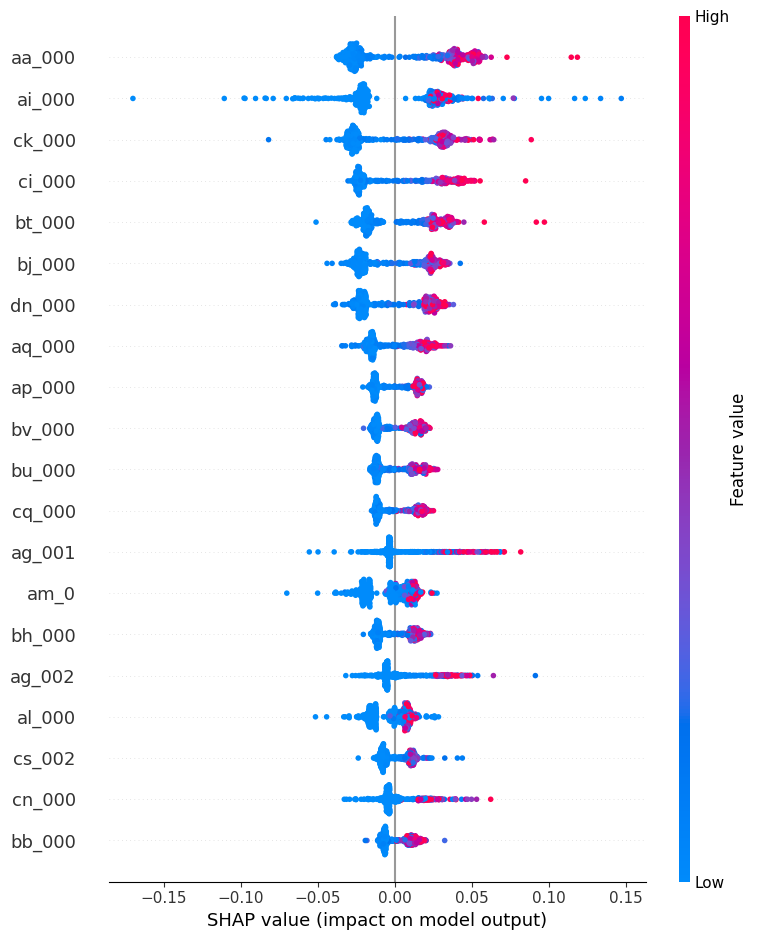

📌 SHAP Local Explanation (Single Prediction)


In [2]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

# ====================================
# 1. Load Data & Model
# ====================================

df = pd.read_csv("../data/processed/processed_data.csv")

X = df.drop("class", axis=1)
y = df["class"]

rf_model = joblib.load("../models/rf_model.pkl")
print("✅ Random Forest model loaded")

# ====================================
# 2. Create SHAP Explainer (NEW API)
# ====================================

explainer = shap.TreeExplainer(rf_model)

# Use subset for speed
X_sample = X.sample(500, random_state=42)

# Compute SHAP values (returns Explanation object)
shap_values = explainer(X_sample)

# ====================================
# 3. GLOBAL EXPLANATION (Summary Plot)
# ====================================

print("📊 SHAP Global Summary Plot (Fault Class)")

shap.summary_plot(
    shap_values[:, :, 1],   # class 1 = Fault
    X_sample,
    show=True
)

# ====================================
# 4. LOCAL EXPLANATION (Single Instance)
# ====================================

shap.initjs()

instance_index = 0

print("📌 SHAP Local Explanation (Single Prediction)")

shap.force_plot(
    shap_values[instance_index, :, 1]
)